1) Add needed imports

In [ ]:
import tensorflow as tf

tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>

2) Import Data : Mnist dataset has 28x28 images of handwritten digits



In [ ]:
mnist = tf.keras.datasets.mnist

3) Divide into training and testing values, and graph data to understand

11490434/11490434 [==============================] - 0s 0us/step


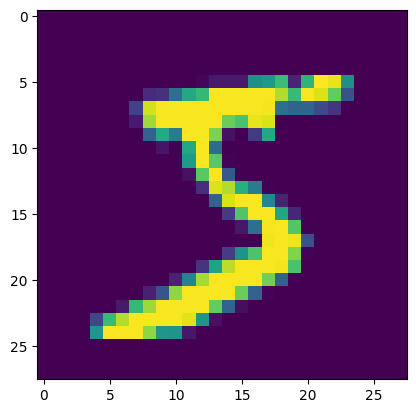

(60000, 28, 28)


In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])   #graphing first number
plt.show()
print(x_train.shape)   #60,000 images, 28x28

4)Normalize data, 0 -> 1

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

5) Build model :
4 layers


1.   Input layer -> flattens incoming images into 1d array
2.   Dense layer with rectified linear activation function
3.   Dense layer with rectified linear activation function
4.    Output layer



In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

6)Train model

In [ ]:
model.compile(optimizer ='adam' , loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train,y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2301 - accuracy: 0.9317
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0972 - accuracy: 0.9705
Epoch 3/3
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0685 - accuracy: 0.9786


Initial accuracy : 95.91%


7) Test Model


accuracy : 95.67%

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9748
0.07784205675125122 0.9747999906539917


8) Save model

In [ ]:
model.save('classifying_minset.model')

9) Load model and use it

313/313 [==============================] - 1s 2ms/step
0


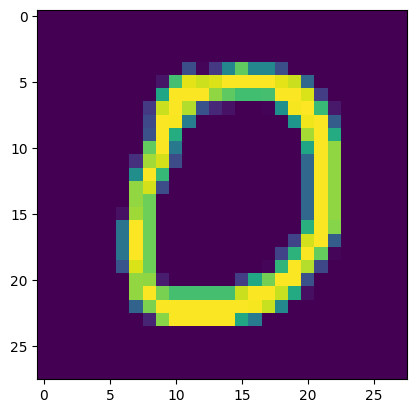

In [ ]:
new_model = tf.keras.models.load_model('classifying_minset.model')
predictions = new_model.predict([x_test])


import numpy as np
print(np.argmax(predictions[10]))


plt.imshow(x_test[10])
plt.show()

Predicted correctly !